In [2]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
from datetime import timedelta
import numpy as np
import matplotlib.colors as mcolors
from matplotlib import cm
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler, 
    Normalizer)
import matplotlib.lines as mlines

## The Plan!
- Chemometrics: Use BMK data to train a Chemometrics model

## To get marks: 
1. **Plotting:** Creat nice looking plots. Increase the complexity of the plots without deacreasing the legibility
2. **PANDAS:** Use Pandas to read/write/manipulate the data
3. **NUMPY:** How would I use NUMPY for this? 
4. **DATETIME:** Use the datetime module in Python 
5. **Machine Learning and Regression:** Use Scikit learn and some sort of regression to answer a question.
6. **Increase the range of the data:** How would I do this?  
 
#### Example:
- How much wind power is there at a particular location?
    - This is quite open ended, is this just the mean wind speed for
an hour/day/month/year, or should you take into account that
there are wind ranges that the windfarms can operate in. (min
max speeds)
    - Some analysis of what power when would be useful (time of
day/year)
- Are the wind speeds likely to be the same in 10 years in the future? ie
is there a trend in recorded wind speeds over the last few decades.
- Is there any other weather metric worth analyzing (eg rain, temp)
- What will the power output of the windfarms in Ireland be like next
week, according to the weather forecasts?

In [3]:
reference_raman_spectra= pd.read_csv("Raw Raman Data - Reference.csv", index_col=0)
reference_raman_spectra.head(n=20)

,0.625 mg/mL IgG1,1.25 mg/mL IgG1,2.5 mg/mL IgG1,5 mg/mL IgG1,10 mg/mL IgG1
RamanShift,,,,,
3425,1148563.488,1198165.702,1206325.744,1195576.347,1145206.568
3424,1147939.547,1200700.777,1209881.628,1200249.487,1143337.351
3423,1146370.469,1203749.020,1208789.471,1202838.240,1141521.697
3422,1146941.245,1207620.020,1206416.272,1204755.062,1142453.918
3421,1149270.003,1207036.815,1206870.556,1207518.608,1146454.739
3420,1151020.458,1202523.303,1210572.212,1210860.394,1151460.412
3419,1152588.026,1201949.196,1214764.209,1210049.996,1153391.413
3418,1152704.622,1205438.810,1216319.624,1204616.249,1150386.364
3417,1150840.010,1206759.138,1214491.418,1201500.448,1146095.797


In [4]:
experimental_raman_spectra= pd.read_csv("Raw Raman Data - Experiment.csv").T #Header=0 doesn't work here as transposition of the csv being read in occurs after that argument is passed
experimental_raman_spectra.columns=experimental_raman_spectra.iloc[0] #Set the first row as the column header.
experimental_raman_spectra.drop(index=experimental_raman_spectra.index[0], inplace=True) #Drop the first row
experimental_raman_spectra.head(n=20)

RamanShift (cm-1),3.166667,8.183333,13.183333,18.166667,23.183333,28.183333,33.183333,38.183333,43.183333,48.183333,53.183333,58.183333,63.183333,68.200000
3425,1781337.659,1773417.748,1788059.266,1792322.172,1777867.130,1774146.732,1787217.920,1786675.277,1779511.730,1788225.600,1772356.837,1662638.965,1734221.718,1733767.574
3424,1784070.893,1779908.423,1793350.673,1794223.501,1778261.178,1776087.531,1792257.386,1787794.559,1784296.506,1784350.966,1765856.329,1660755.707,1738868.342,1735666.025
3423,1784213.430,1783092.989,1796587.877,1793310.977,1780583.283,1777577.139,1798423.942,1788405.908,1783740.508,1781434.466,1764422.752,1663915.426,1736379.481,1738727.742
3422,1785077.556,1780479.128,1795893.368,1794067.141,1785154.087,1779767.395,1804203.414,1791386.044,1780540.869,1785527.640,1770307.491,1668102.333,1734063.291,1743231.899
3421,1788761.463,1776801.698,1791839.122,1798414.368,1786134.571,1781440.602,1804657.052,1793752.175,1781275.126,1790697.984,1778844.431,1670313.133,1739308.790,1746468.612
3420,1793117.657,1778499.115,1791067.149,1802199.146,1782864.379,1782296.498,1799820.852,1792101.234,1786205.050,1791144.193,1782507.883,1673186.193,1744550.628,1748747.497
3419,1795320.582,1781712.169,1795815.745,1804753.508,1781903.318,1785182.739,1798526.709,1789460.247,1788888.756,1791518.887,1780601.642,1678273.390,1744321.716,1750484.314
3418,1795560.779,1780453.783,1799200.087,1808070.269,1784138.285,1789525.191,1804005.256,1792004.870,1785302.431,1795285.893,1779009.008,1682170.651,1745353.538,1749088.623
3417,1796205.625,1779105.692,1798065.690,1808942.475,1785080.779,1789690.913,1809480.054,1795759.257,1778670.308,1800308.999,1780017.481,1682443.498,1748955.104,1745974.920
3416,1797329.744,1781236.232,1796928.242,1803749.116,1784498.039,1784510.542,1809384.791,1793147.619,1775501.175,1803931.964,1779997.423,1681524.104,1750123.671,1745822.354


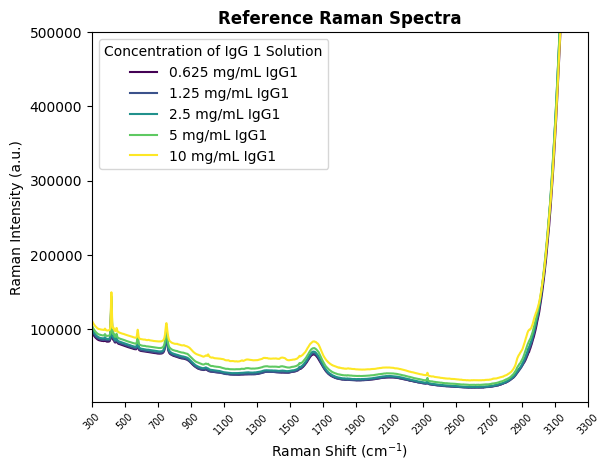

In [5]:
ramanshift=np.sort(np.array(reference_raman_spectra.index, dtype=int)) #Need to sort the wavenumbers for the x-axis
purple_colors = cm.viridis(np.linspace(0, 1, len(reference_raman_spectra.columns))) #Generate a shorter colourmap 

fig, ax = plt.subplots()
for i, column in enumerate(reference_raman_spectra.columns):
    ax.plot(
        reference_raman_spectra.index,
        reference_raman_spectra[column],
        label=column,
        color=purple_colors[i]
    )
ax.set_xticks(ramanshift[::200])
ax.set_xticklabels(ramanshift[::200], rotation=45, 
                   fontdict= {'fontsize': 'x-small',}
                   )
ax.set_xlim(300,3300)
ax.set_ylim(2500,0.5e6)
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title("Reference Raman Spectra",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend(title= "Concentration of IgG 1 Solution")

## Generating the legend
For many applications, a perceptually uniform colormap is the best choice; i.e. a colormap in which equal steps in data are perceived as equal steps in the color space. Researchers have found that the human brain perceives changes in the lightness parameter as changes in the data much better than, for example, changes in hue. Therefore, colormaps which have monotonically increasing lightness through the colormap will be better interpreted by the viewer
References: 
- [Reference for how to choose appropriate colour maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html#sphx-glr-users-explain-colors-colormaps-py) 
- [Reference for the colourmaps available](https://matplotlib.org/stable/gallery/color/colormap_reference.html) 
- [Reference for fixing the scale on the matplolib colour maps](https://matplotlib.org/stable/users/explain/colors/colorbar_only.html)
- [Reference for fixing the legend through creating proxy artists](https://matplotlib.org/stable/users/explain/axes/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists)
- [Controlling the legend entries](https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries)
- [Adding multiple legends to same axis](https://matplotlib.org/stable/users/explain/axes/legend_guide.html#multiple-legends-on-the-same-axes)
- [Chapter on Python for Datascience legend formatting](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html#Multiple-Legends)


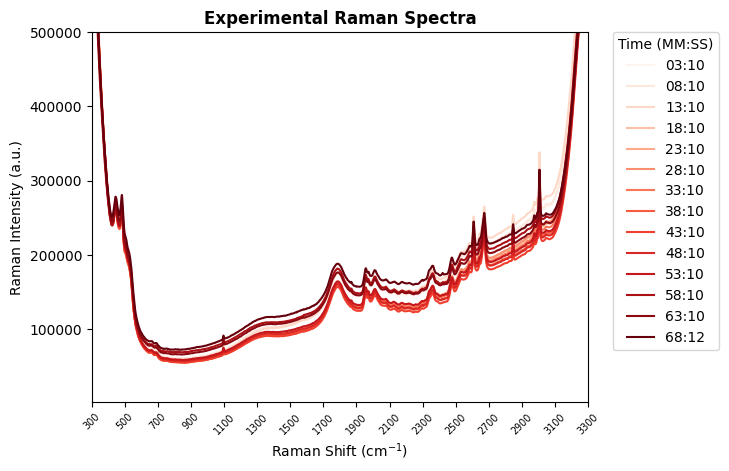

In [6]:
#Generation of the x-axis 
wavenumbers = np.sort(np.array(experimental_raman_spectra.index, dtype=int))

#Formatting the time data for the legend:
#Use timedelta to convert the data frame columns (1D array of  dtype='float64') to MM:SS
sampling_time = [timedelta(minutes=minutes) for minutes in experimental_raman_spectra.columns]
sampling_time_formatted = [f"{(time.seconds//60):02}:{(time.seconds%60):02}" for time in sampling_time]

red_colors = cm.Reds(np.linspace(0, 1, len(experimental_raman_spectra.columns)))

fig, ax = plt.subplots()

for i, column in enumerate(experimental_raman_spectra):
    ax.plot(
        experimental_raman_spectra.index,
        experimental_raman_spectra[column],
        label=column,
        color=red_colors[i]
    )
ax.set_xticks(wavenumbers[::200])
ax.set_xticklabels(wavenumbers[::200], rotation=45, 
                   fontdict= {'fontsize': 'x-small',}
                   )
ax.set_xlim(300,3300)
ax.set_ylim(2500,0.5e6)
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title("Experimental Raman Spectra",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend(title= "Time (MM:SS)",
          labels= sampling_time_formatted,
          loc="upper left",
          bbox_to_anchor=(1.05, 1),
          borderaxespad=0
          )

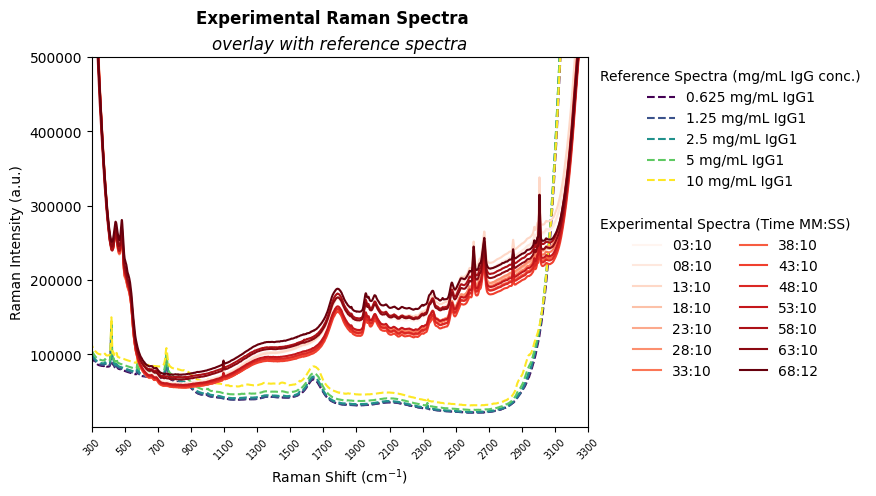

In [7]:
# Set up the color maps and the axes as previously: 
wavenumbers = np.sort(np.array(experimental_raman_spectra.index, dtype=int)) #x-axis values
red_colors = cm.Reds(np.linspace(0, 1, len(experimental_raman_spectra.columns))) #red colour maps for time data
purple_colors = cm.viridis(np.linspace(0, 1, len(reference_raman_spectra.columns))) #purply green colour map for reference concentration data

fig, ax = plt.subplots()

for i, column in enumerate(reference_raman_spectra.columns):
    ax.plot(
        reference_raman_spectra.index,
        reference_raman_spectra[column],
        label=column,
        color=purple_colors[i],
        linestyle="--"
    )
for i, column in enumerate(experimental_raman_spectra):
    ax.plot(
        experimental_raman_spectra.index,
        experimental_raman_spectra[column],
        label=column,
        color=red_colors[i]
    )
ax.set_xticks(wavenumbers[::200])
ax.set_xticklabels(wavenumbers[::200], rotation=45, 
                   fontdict= {'fontsize': 'x-small',}
                   )
ax.set_xlim(300,3300)
ax.set_ylim(2500,0.5e6)
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title(f"overlay with reference spectra",
             fontdict = {'fontsize': 'large','fontstyle' : "italic",}
             )
fig.suptitle(f"Experimental Raman Spectra",
             fontweight="bold"
             )
#Generate the legends: 
handles, labels = ax.get_legend_handles_labels()
exp_data_legend=ax.legend(handles=handles[len(reference_raman_spectra.columns):], 
                          labels=sampling_time_formatted,
                          title="Experimental Spectra (Time MM:SS)",
                          loc="upper left",
                          bbox_to_anchor=(1, 0.6),
                          ncols=2,
                          frameon=False)
ax.add_artist(exp_data_legend)
ax.legend(handles[0:len(reference_raman_spectra.columns)], 
          labels[0:len(reference_raman_spectra.columns)],
          title="Reference Spectra (mg/mL IgG conc.)",
          loc="upper left",
          bbox_to_anchor=(1, 1),
          frameon=False
          )


## To do: 
- Use SNV to normalise the data
**Why Use SNV?**
The SNV technique helps reduce scatter and improve the clarity of the signal that really matters in Near-IR data. By minimizing noise, it allows for more accurate interpretation of the spectra and better overall results when applying models for analysis - from this [Medium article](https://medium.com/@chrisjpulliam/standard-normal-variate-snv-signal-processing-for-near-ir-data-f9bb7a96a42d) or the use of SNV for Near-IR data. 

Scikit learn preprocessing tool documentation: 
- https://scikit-learn.org/1.5/modules/preprocessing.html
- https://scikit-learn.org/1.5/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
- https://scikit-learn.org/1.5/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
- https://stackoverflow.com/questions/39120942/difference-between-standardscaler-and-normalizer-in-sklearn-preprocessing


## To do:
- Do I need a different normalisation? 
- Fix the legend title
- Change the colour scheme

In [8]:
SNV_scaled_reference_spectra=preprocessing.StandardScaler().fit_transform(np.array(reference_raman_spectra))
SNV_scaled_experimental_spectra=preprocessing.StandardScaler().fit_transform(np.array(experimental_raman_spectra))

minmax_scaled_reference_spectra=MinMaxScaler().fit_transform(np.array(reference_raman_spectra))
minmax_scaled_experimental_spectra=MinMaxScaler().fit_transform(np.array(experimental_raman_spectra))

maxabs_scaled_reference_spectra=MaxAbsScaler().fit_transform(np.array(reference_raman_spectra))
maxabs_scaled_experimental_spectra=MaxAbsScaler().fit_transform(np.array(experimental_raman_spectra))

#Make the arrays of scaled array of data back into Pandas dataframes for matplotlib plotting: 
SNV_scaled_reference_spectra_df = pd.DataFrame(
    SNV_scaled_reference_spectra,
    index=reference_raman_spectra.index,
    columns=reference_raman_spectra.columns
)
SNV_scaled_experimental_spectra_df= pd.DataFrame(
    SNV_scaled_experimental_spectra,
    index=experimental_raman_spectra.index,
    columns=sampling_time_formatted
)

minmax_scaled_reference_spectra_df = pd.DataFrame(
    minmax_scaled_reference_spectra,
    index=reference_raman_spectra.index,
    columns=reference_raman_spectra.columns
)
minmax_scaled_experimental_spectra_df= pd.DataFrame(
    minmax_scaled_experimental_spectra,
    index=experimental_raman_spectra.index,
    columns=sampling_time_formatted
)

maxabs_scaled_reference_spectra_df = pd.DataFrame(
    maxabs_scaled_reference_spectra,
    index=reference_raman_spectra.index,
    columns=reference_raman_spectra.columns
)
maxabs_scaled_experimental_spectra_df= pd.DataFrame(
    maxabs_scaled_experimental_spectra,
    index=experimental_raman_spectra.index,
    columns=sampling_time_formatted
)

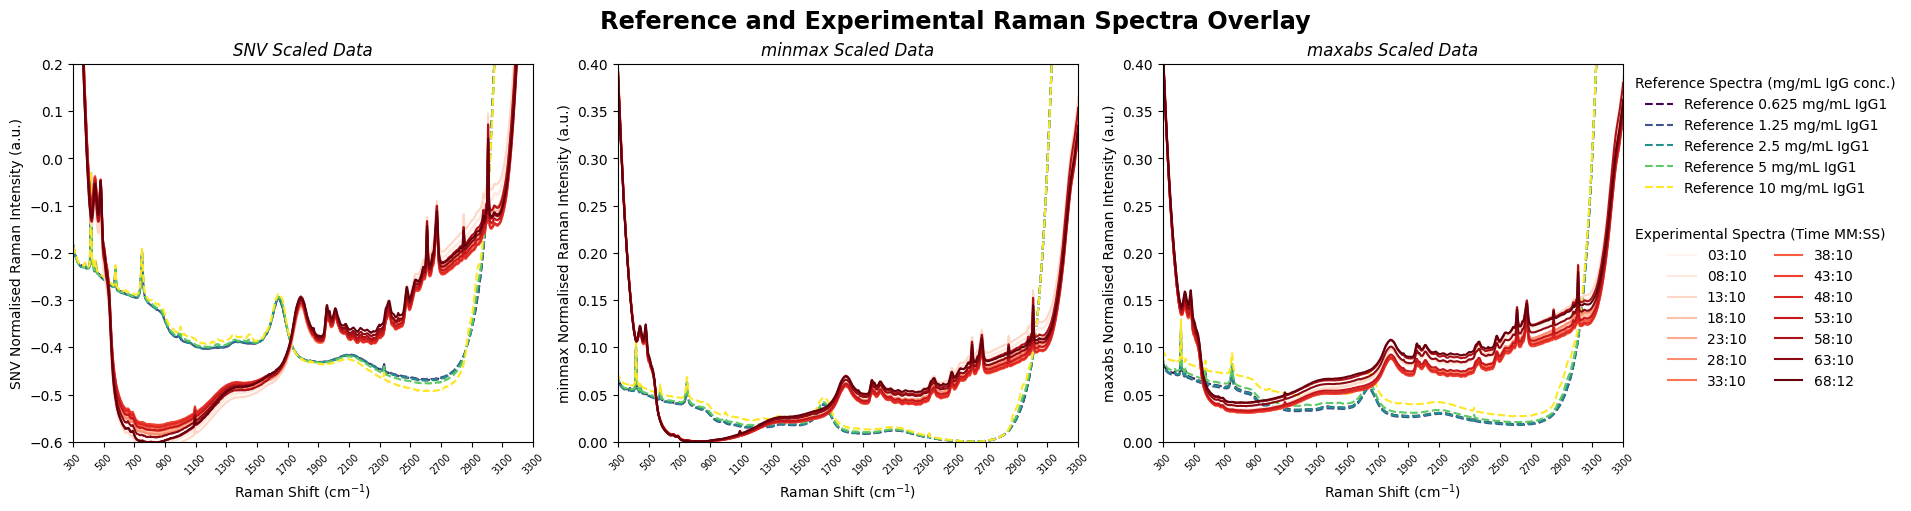

In [11]:
# Set up the color maps and the axes as previously: 
wavenumbers = np.sort(np.array(experimental_raman_spectra.index, dtype=int)) #x-axis values
red_colors = cm.Reds(np.linspace(0, 1, len(experimental_raman_spectra.columns))) #red colour maps for time data
purple_colors = cm.viridis(np.linspace(0, 1, len(reference_raman_spectra.columns))) #purply green colour map for reference concentration data

#Put the data frames into a dict so that it can be cycled through in a for loop:
scaled_data_frames = {
    "SNV_scaled_reference_spectra_df": SNV_scaled_reference_spectra_df,
    "SNV_scaled_experimental_spectra_df": SNV_scaled_experimental_spectra_df,
    "minmax_scaled_reference_spectra_df": minmax_scaled_reference_spectra_df,
    "minmax_scaled_experimental_spectra_df": minmax_scaled_experimental_spectra_df,
    "maxabs_scaled_reference_spectra_df": maxabs_scaled_reference_spectra_df,
    "maxabs_scaled_experimental_spectra_df": maxabs_scaled_experimental_spectra_df,
}

###########PLOT THE DATA:#############
fig,ax=plt.subplots(1, 3, figsize=(19, 5), layout = "constrained")

for i, scaler in enumerate(["SNV", "minmax", "maxabs"]):
    reference_data_scaled = scaled_data_frames[f"{scaler}_scaled_reference_spectra_df"]
    experimental_data_scaled = scaled_data_frames[f"{scaler}_scaled_experimental_spectra_df"]
    #Plot the reference spectra:
    for j, column in enumerate(reference_data_scaled): #Gives each Column an index id to call for the list of colours I want to use
        ax[i].plot(
            reference_data_scaled.index,
            reference_data_scaled[column],
            linestyle="--",
            color=purple_colors[j],
            label=f"Reference {column}")
    #Plot the experimental data: 
    for j, column in enumerate(experimental_data_scaled):
        ax[i].plot(
            experimental_data_scaled.index,
            experimental_data_scaled[column],
            linestyle="-",
            color=red_colors[j],
            label=f"Experimental {sampling_time_formatted[j]}")
    ax[i].set_xticks(wavenumbers[::200])
    ax[i].set_xticklabels(wavenumbers[::200], rotation=45,fontdict= {'fontsize': 'x-small',})
    ax[i].set_xlim(300,3300)
    # ax[i].set_ylim(0,0.5)
    if scaler == "SNV":
        ax[i].set_ylim(-0.6, 0.2) 
    else:
        ax[i].set_ylim(0, 0.4) 
    ax[i].set_xlabel(r'Raman Shift (cm$^{-1})$')
    ax[i].set_ylabel(f"{scaler} Normalised Raman Intensity (a.u.)")
    ax[i].set_title(f"{scaler} Scaled Data",fontdict = {'fontsize': 'large','fontstyle' : "italic",})
    
fig.suptitle(f"Reference and Experimental Raman Spectra Overlay",
             fontweight="bold",
             fontsize="xx-large"
             )
#Generate the legends: 
handles, labels = ax[2].get_legend_handles_labels()
exp_data_legend=ax[2].legend(handles=handles[len(reference_raman_spectra.columns):], 
                          labels=sampling_time_formatted,
                          title="Experimental Spectra (Time MM:SS)",
                          loc="upper left",
                          bbox_to_anchor=(1, 0.6),
                          ncols=2,
                          frameon=False)
ax[2].add_artist(exp_data_legend)
ax[2].legend(handles[0:len(reference_raman_spectra.columns)], 
          labels[0:len(reference_raman_spectra.columns)],
          title="Reference Spectra (mg/mL IgG conc.)",
          loc="upper left",
          bbox_to_anchor=(1, 1),
          frameon=False
          )



*********************
# *END*